This notebook demonstrates how to use the diagnostic tools in the AnalyzeWLS and AnalyzeWLSDict classes. First, import packages.

In [23]:
import os
import inspect
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from modules.Utils.analyze_wls import *
from kpfpipe.models.level1 import KPF1
%matplotlib inline

## Read Files and Instantiate Objects

In [32]:
# for AnalyzeWLS
red_thar_wls_fn = '/testdata/WLS/20230731/kpf_20230731_master_WLS_/data/masters//20230731/kpf_20230731_master_arclamp_autocal-thar-all-morn_L1.fits'
red_thar_WLS_L1 = KPF1.from_fits(red_thar_wls_fn)
red_thar_WLS = AnalyzeWLS(red_thar_WLS_L1)

# for AnalyzeWLSDict and AnalyzeWLS2Dict
cal_type = 'thar' # 'lfc'
red_lfc_dict_fn    = '/testdata/WLS/20230731/kpf_20230731_master_WLS_/data/masters//20230731/kpf_20230731_master_arclamp_autocal-lfc-all-morn_RED_L1.json.gz'
green_lfc_dict_fn  = '/testdata/WLS/20230731/kpf_20230731_master_WLS_/data/masters//20230731/kpf_20230731_master_arclamp_autocal-lfc-all-morn_GREEN_L1.json.gz'
#red_thar_dict_fn   = '/testdata/WLS/20230731/kpf_20230731_master_WLS_/data/masters//20230731/kpf_20230731_master_arclamp_autocal-thar-all-morn_RED_L1.json.gz'
#green_thar_dict_fn = '/testdata/WLS/20230731/kpf_20230731_master_WLS_/data/masters//20230731/kpf_20230731_master_arclamp_autocal-thar-all-morn_GREEN_L1.json.gz'

red_thar_dict_fn   = '/testdata/WLS/20230430/KP.20230430.31963.46_L1.fits_WLS_RED_L1.json.gz'
green_thar_dict_fn = '/testdata/WLS/20230430/KP.20230430.31963.46_L1.fits_WLS_GREEN_L1.json.gz'

red_lfc_WLSDict    = AnalyzeWLSDict(red_lfc_dict_fn)
green_lfc_WLSDict  = AnalyzeWLSDict(green_lfc_dict_fn)
red_thar_WLSDict   = AnalyzeWLSDict(red_thar_dict_fn)
green_thar_WLSDict = AnalyzeWLSDict(green_thar_dict_fn)

## Examining WLS Dictionaries
Note that the dictionaries are huge (tens of MB) and running > print(red_lfc_WLSDict) will cause Jupyter Notebook to crash.  Instead, you can use the print_dict method in modules.Utils.analyze_wls which limits the number depth in the heirarchy that is printed.  The cell below explors one of the directories.

In [54]:
print_dict(red_thar_WLSDict.wls_dict['orderlets']['CAL']['orders'][3]['lines'][2], max_depth=1)

amp:
	9380.924124405972
mu:
	844.2607842568493
sig:
	1.4210644764687181
const:
	-8.194970892501047
covar:
	[[ 1.64162905e+05 -2.30194266e-06  1.72769573e+01 -8.20814606e+03]
 [-2.30194266e-06  3.21418375e-03 -1.51685026e-08 -9.60799178e-08]
 [ 1.72769573e+01 -1.51685026e-08  4.05131278e-03 -8.63847124e-01]
 [-8.20814606e+03 -9.60799178e-08 -8.63847124e-01  1.06422302e+03]]
data:
	[ 3.23787164e+01  3.19365655e+01  4.55237686e+01  2.40733227e+01
  4.67263736e+00  2.89933913e+01  7.14848313e+01  7.74749701e+02
  1.90652449e+03  2.35219887e+03  2.29003240e+03  1.45872026e+03
  1.43241278e+02  2.02924788e+01 -1.53488889e+01 -9.22846767e+00
 -1.03995731e+00  2.94201770e+01 -8.64071337e+00  3.70399012e+01]
model:
	[  -8.19496762   -8.19475243   -8.18600135   -7.967851     -4.64294773
   26.16898163  197.76978783  757.65352393 1760.46638929 2530.66459415
 2257.90389556 1249.32911502  425.42031421   84.62164197    4.1227763
   -7.18294871   -8.14357433   -8.19335988   -8.19493977   -8.19497052]

## List Methods in AnalyzeWLS
This methods in this class operate on wavelength solution in Level 1 objects.

In [3]:
for name, method in inspect.getmembers(red_thar_WLS, predicate=inspect.ismethod):
    print(f"Method Name: {name}")
    print(f"Doc String: {method.__doc__}\n")

Method Name: __init__
Doc String: None

Method Name: plot_WLS_orderlet_diff
Doc String: 
        Make a plot of differences between the wavelength solutions for the orders.

        Args:
            chip (string) - "green" or "red"
            fig_path (string) - set to the path for the file to be generated.
                                default=None
            show_plot (boolean) - show the plot in the current environment.
                                  default=False

        Returns:
            PNG plot in fig_path or shows the plot it the current environment
            (e.g., in a Jupyter Notebook).
        



## Plot the WLS Difference Between Orderlets

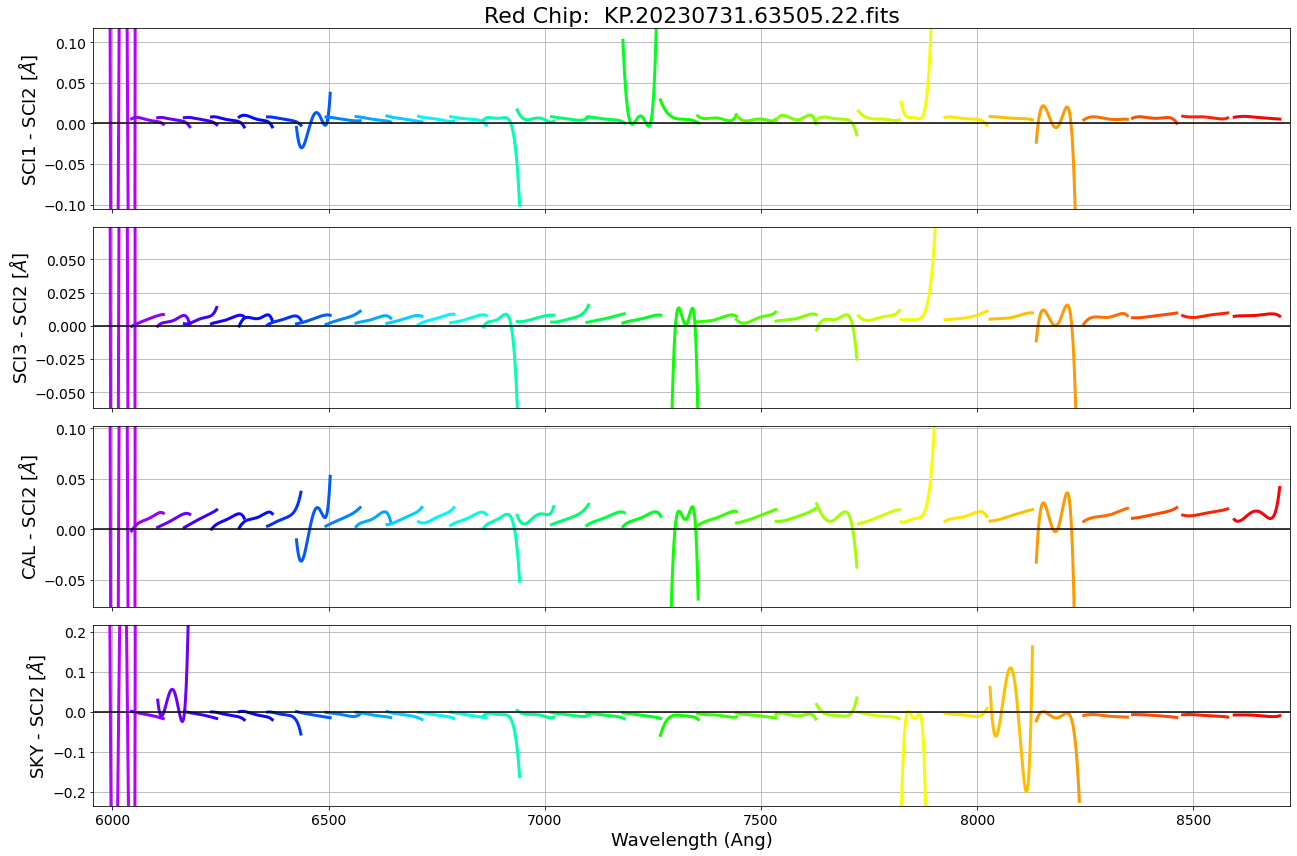

In [4]:
red_thar_WLS.plot_WLS_orderlet_diff(chip='red', show_plot=True)

## List Methods in AnalyzeWLSDict
This methods in this class operate on JSON dictionaries generated during the process of a generating wavelength solution.

In [5]:
for name, method in inspect.getmembers(green_thar_WLSDict, predicate=inspect.ismethod):
    print(f"Method Name: {name}")
    print(f"Doc String: {method.__doc__}\n")

Method Name: __init__
Doc String: None

Method Name: plot_WLS_line
Doc String: 
        Generate a plot of a single spectral line.

        Args:
            orderlet (string) - 'SCI1', 'SCI2', 'SCI3', 'CAL', or 'SKY'
            order (integer) - order number
            line (integer) - line number
            fig_path (string) - set to the path for the file to be generated.
                                default=None
            show_plot (boolean) - show the plot in the current environment.
                                  default=False

        Returns:
            PNG plot in fig_path or shows the plot it in the current environment 
            (e.g., in a Jupyter Notebook).
        

Method Name: plot_WLS_lines_in_order
Doc String: 
        Generate an array plots of spectral lines.

        Args:
            orderlet (string) - 'SCI1', 'SCI2', 'SCI3', 'CAL', or 'SKY'
            order (integer) - order number
            fig_path (string) - set to the path for the file to be 

## Plot a single line

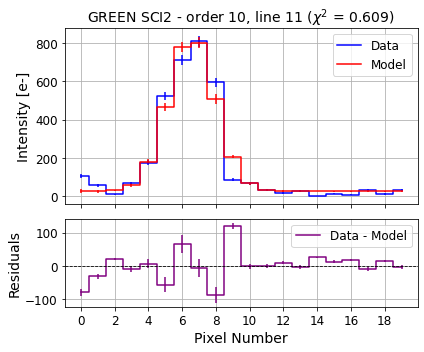

In [15]:
green_thar_WLSDict.plot_WLS_line('SCI2', 10, 11, show_plot=True)

## Plot all lines in an order
The annotations indicate fit parameters and statistics.  The background shading indicates chi^2 of the fit (red = bad).

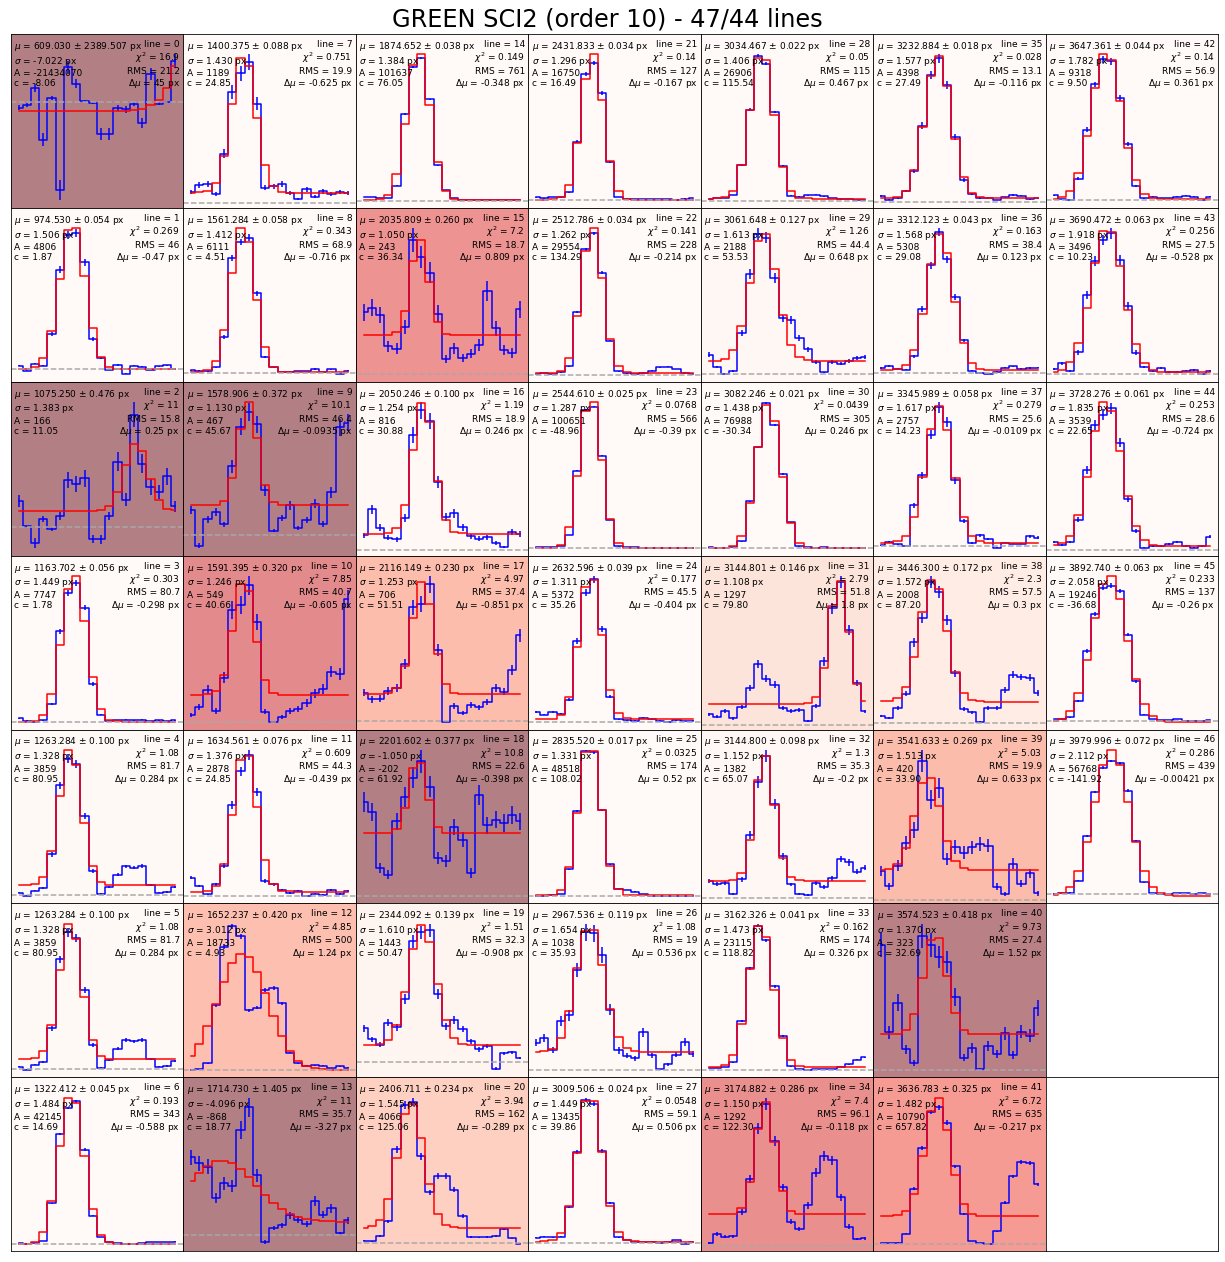

In [16]:
green_thar_WLSDict.plot_WLS_lines_in_order('SCI2', 10, show_plot=True)

## Plot all lines in an orderlet
The annotations indicate fit parameters and statistics.  The background shading indicates chi^2 of the fit (red = bad).

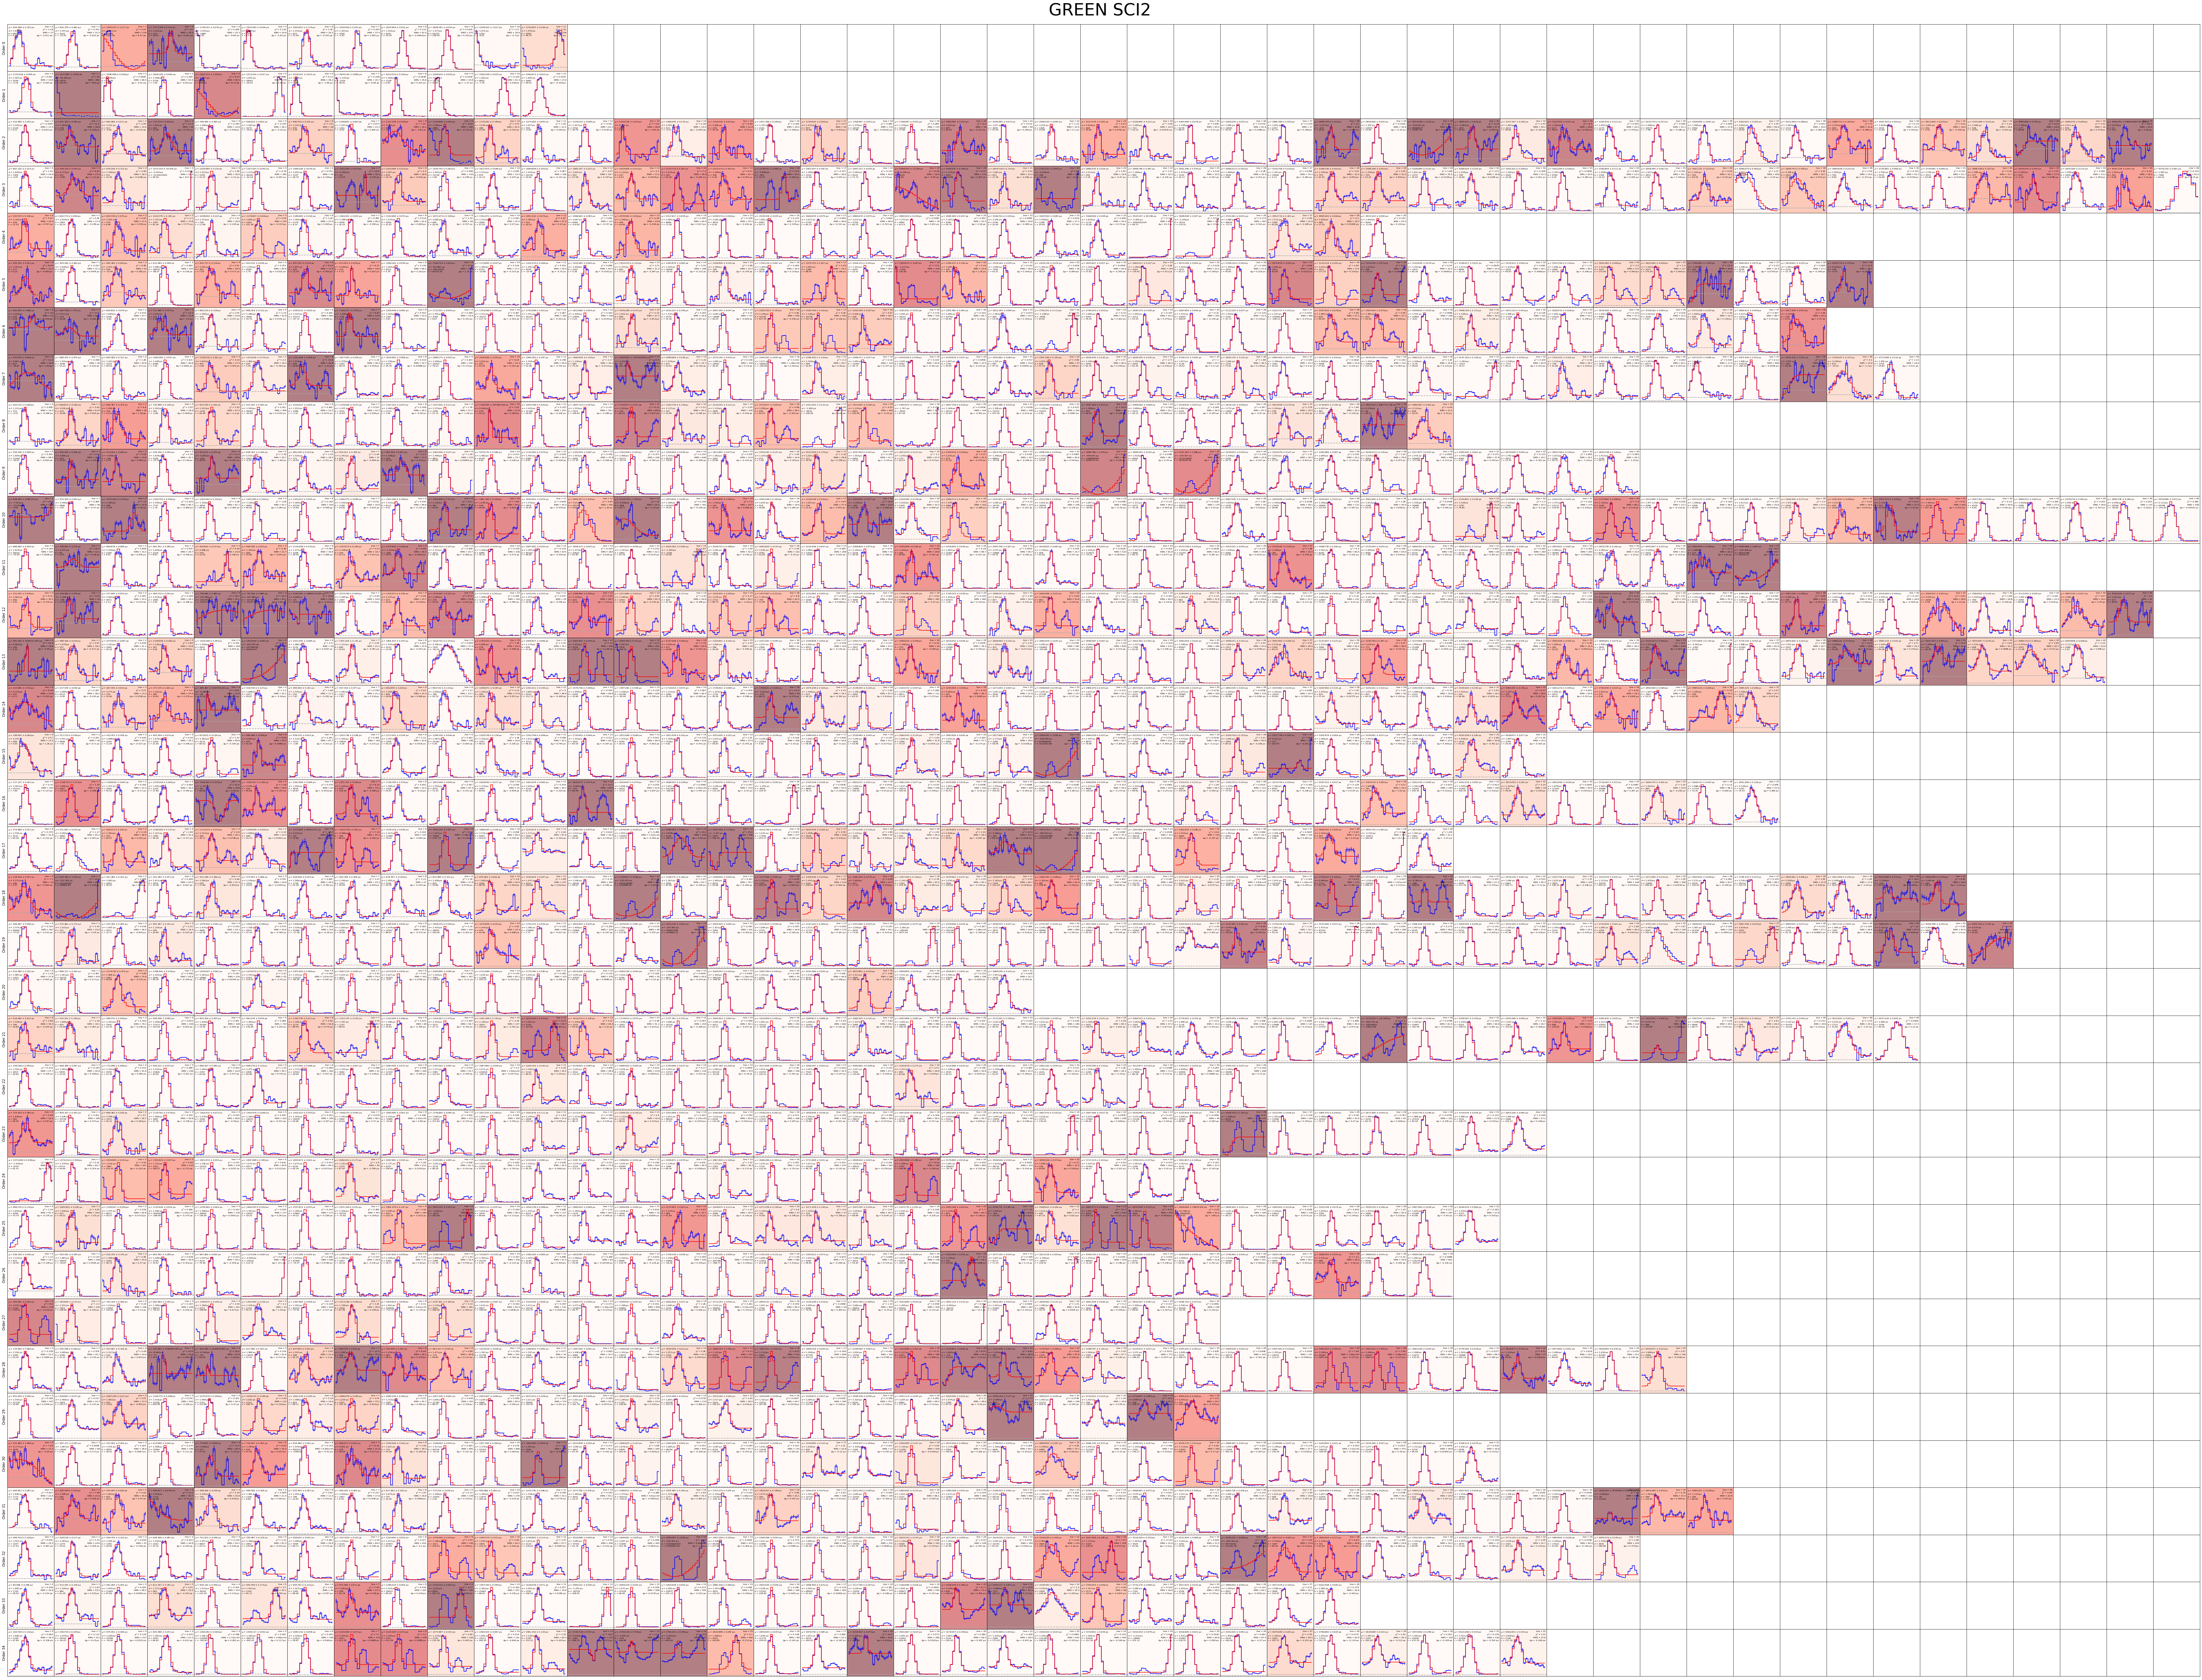

In [17]:
green_thar_WLSDict.plot_WLS_lines_in_orderlet('SCI2', show_plot=True)

## List Methods in AnalyzeWLS2Dict
The methods in this class involve the wavelength solutions from two JSON dictionaries.

In [9]:
orderlet = 'SCI2'
red_thar_LFC_2WLSDict = AnalyzeTwoWLSDict(red_lfc_dict_fn,   red_thar_dict_fn,   name1='LFC', name2='ThAr')

for name, method in inspect.getmembers(red_thar_LFC_2WLSDict, predicate=inspect.ismethod):
    print(f"Method Name: {name}")
    print(f"Doc String: {method.__doc__}\n")

Method Name: __init__
Doc String: None

Method Name: plot_wave_diff_wls
Doc String: 
        Generate an array of plots of the difference between two wavelength solutions 
        for the orders of a given orderlet.

        Args:
            orderlet (string) - 'SCI1', 'SCI2', 'SCI3', 'CAL', or 'SKY'
            fig_path (string) - set to the path for the file to be generated.
                                default=None
            show_plot (boolean) - show the plot in the current environment.
                                  default=False                                  
            warming_ms (double) - level in m/s where the orange 'warning' boxes start
                                  default=10
            alarm_ms (double) - level in m/s where the orange 'warning' boxes end
                                and the red 'alarm' boxes being
                                default=100

        Returns:
            PNG plot in fig_path or shows the plot it in the current environm

## Plot Differences Between Two Wavelength Solutions
Each panel is a spectral order. The bottom right corner shows the average offset as a function of order.

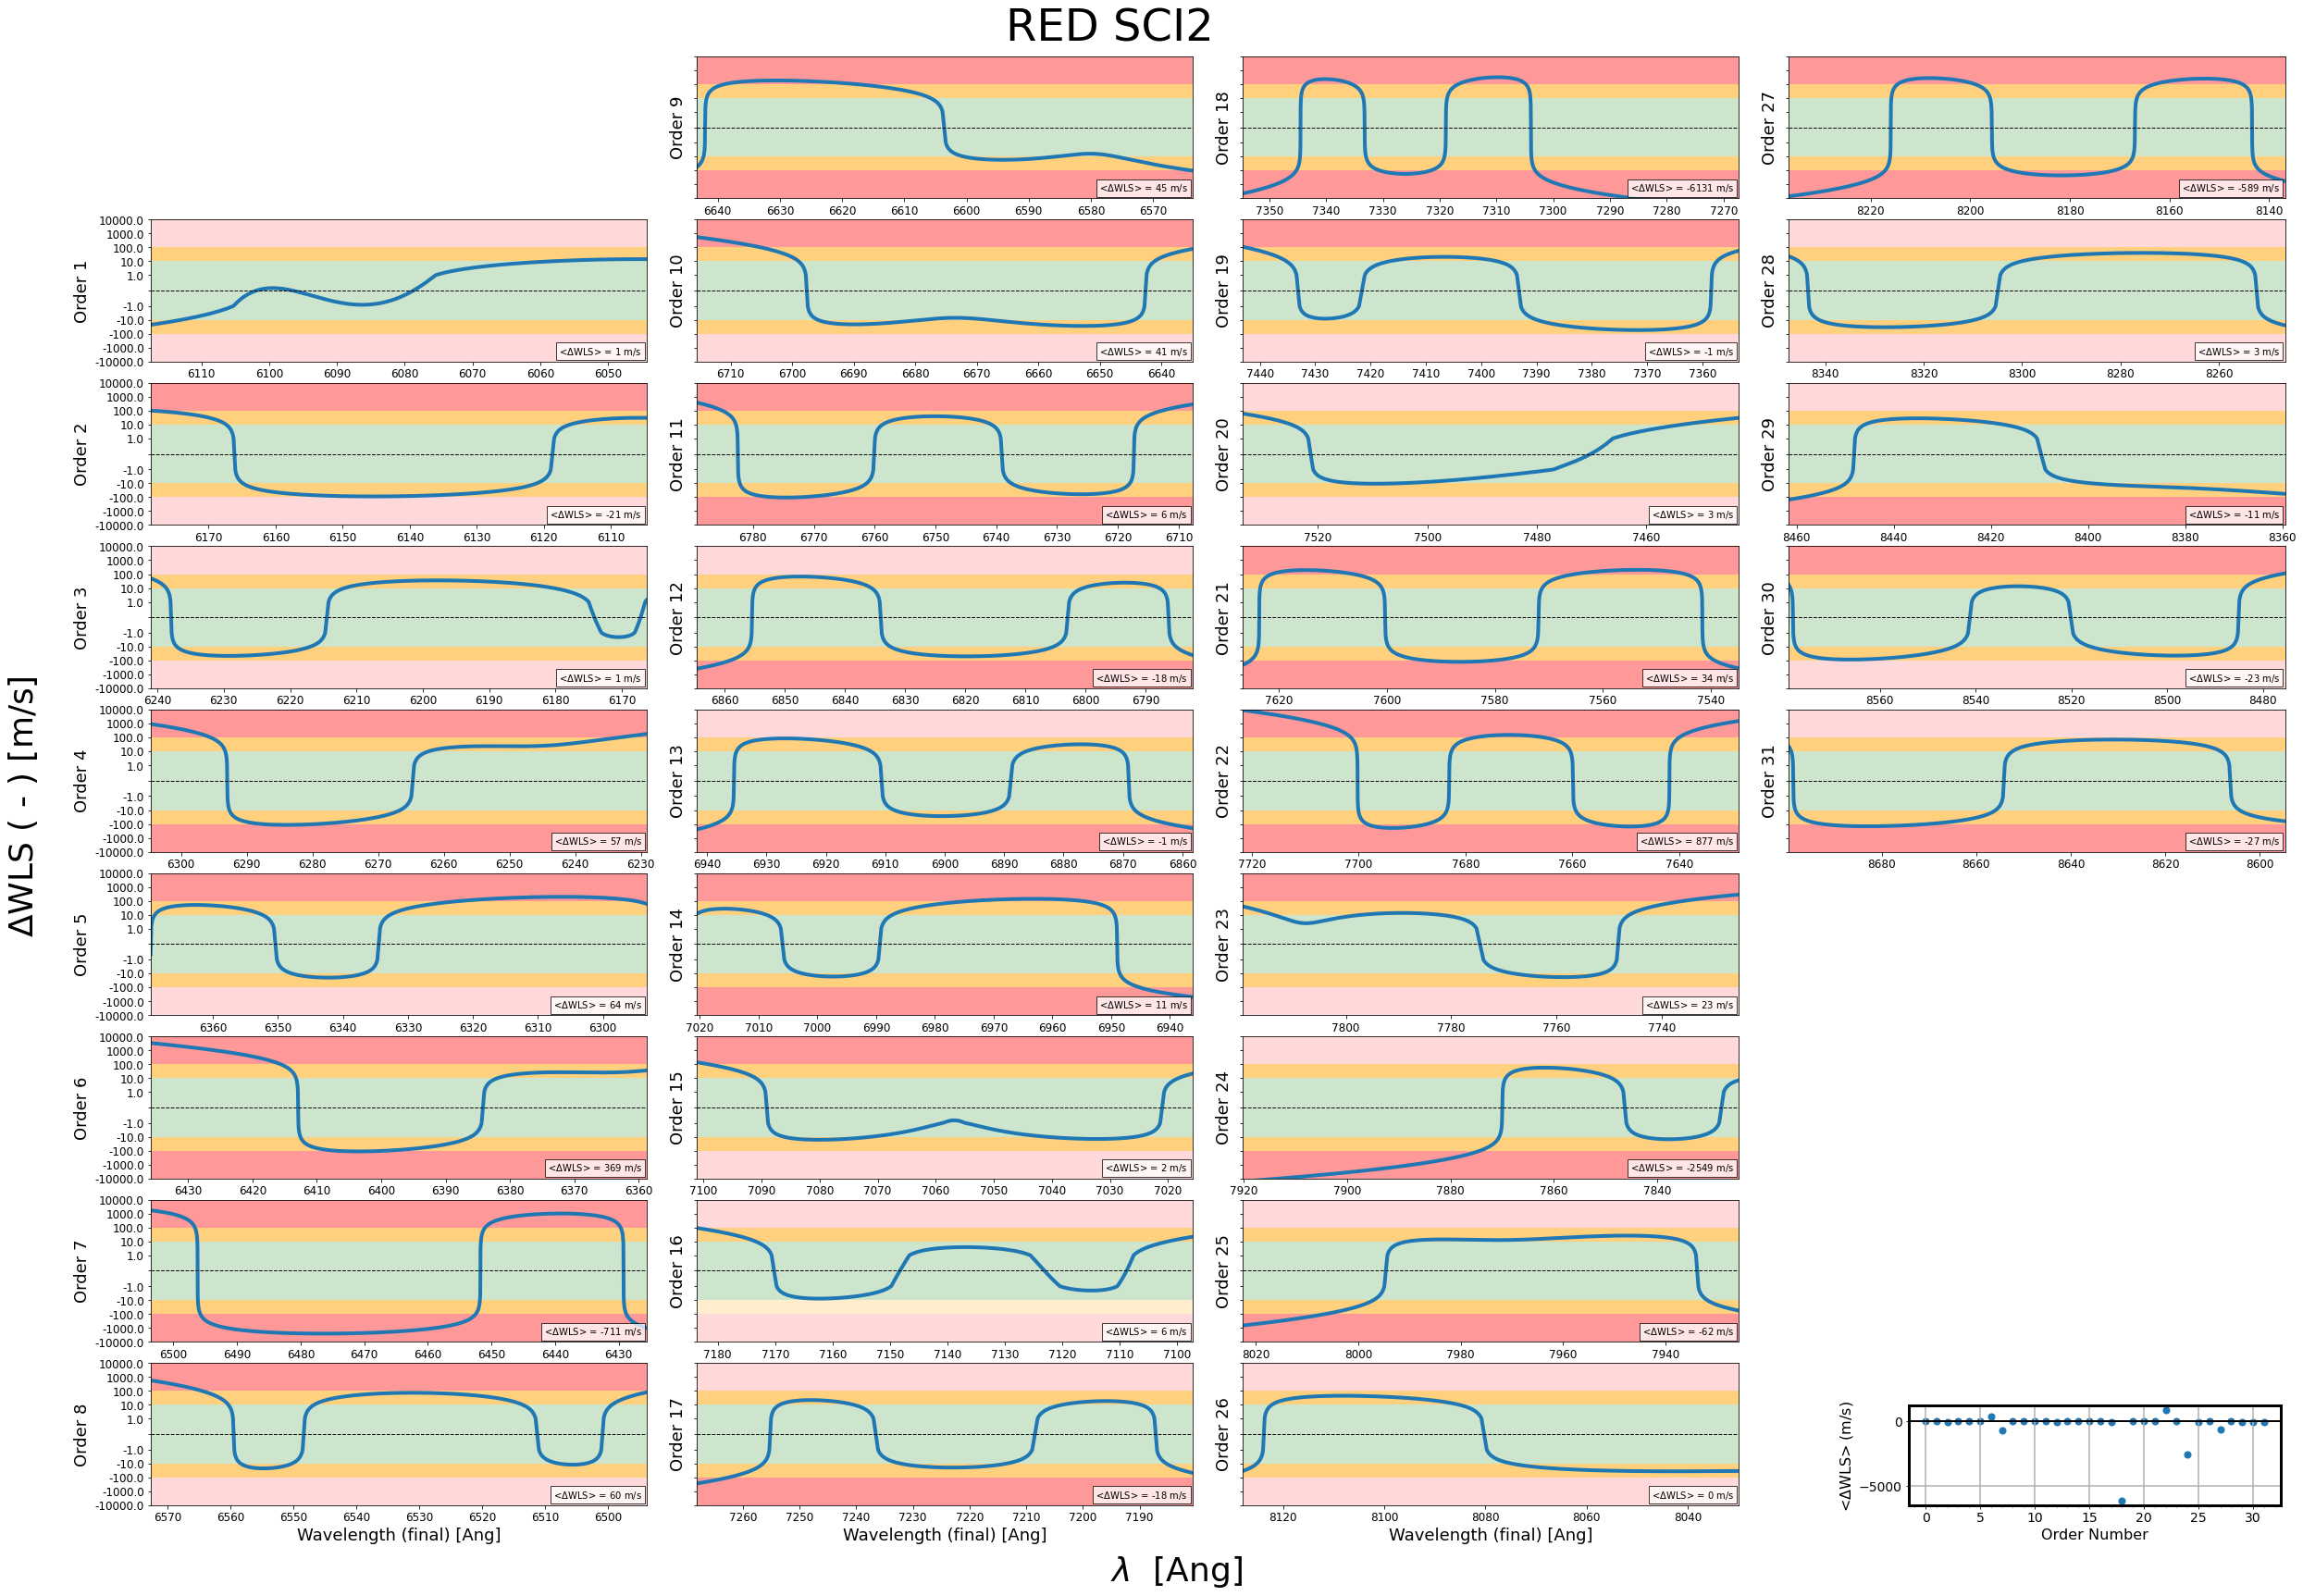

In [10]:
two_dicts = AnalyzeTwoWLSDict(red_thar_dict_fn, red_lfc_dict_fn)
two_dicts.plot_wave_diff_wls('SCI2', show_plot=True)

## Plot the Coverage of a Wavelengh Solution

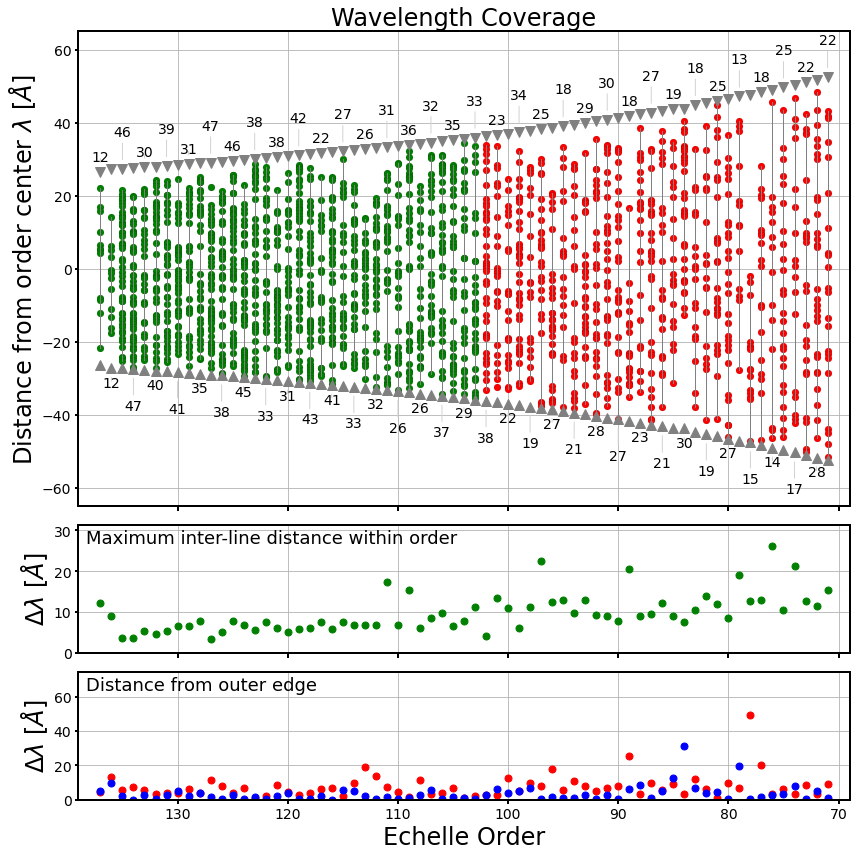

In [18]:
two_dicts = AnalyzeTwoWLSDict(green_thar_dict_fn, red_thar_dict_fn)
two_dicts.plot_wavelength_coverage(show_plot=True)